In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [4]:
data_processed = pd.read_csv('processed_films_data.csv', index_col='id')

In [5]:
from sklearn.preprocessing import StandardScaler

numerical_features = ['RatingCount', 'Len_review',
                       'Actors_sum_freq', 'Keywords_sum_freq', 'Date_published_num', 'Count_films']

scaler = StandardScaler()
data_processed[numerical_features] = scaler.fit_transform(data_processed[numerical_features])

In [6]:
data_processed

,RatingCount,RatingValue,Len_review,Actors_sum_freq,Keywords_sum_freq,Date_published_num,Count_films,Action,Adult,Adventure,...,News,Reality-TV,Romance,Sci-Fi,Short,Sport,Talk-Show,Thriller,War,Western
id,,,,,,,,,,,,,,,,,,,,,
0,-0.206311,7.4,4.912280,-1.038220,-0.292156,-4.725935,-0.588492,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1,-0.229353,6.4,-0.459688,-0.325605,-0.687426,-4.501390,-0.588492,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,-0.224281,5.2,-1.244213,-0.325605,-0.930977,-4.433789,-0.430170,0,0,0,...,0,0,0,0,1,0,0,0,0,0
3,-0.202039,6.7,-0.242039,-1.062793,-0.601585,-4.366187,-0.430170,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,-0.165203,7.3,-0.728781,-0.964501,-0.761290,-4.298586,-0.430170,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48497,0.246090,6.5,-0.842552,-0.546761,0.059196,1.146656,1.786341,0,0,1,...,0,0,0,0,0,0,0,0,1,0
48498,-0.212739,5.7,-0.372628,1.001332,0.238865,1.154582,-0.667653,1,0,0,...,0,0,0,0,0,0,0,1,0,0
48499,-0.227400,6.6,0.201173,-0.989074,0.262821,1.172813,-0.667653,0,0,0,...,0,0,0,1,0,0,0,0,0,0


In [7]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

X = data_processed.drop('RatingValue', axis=1)
y = data_processed['RatingValue']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Features correlation

<Axes: >

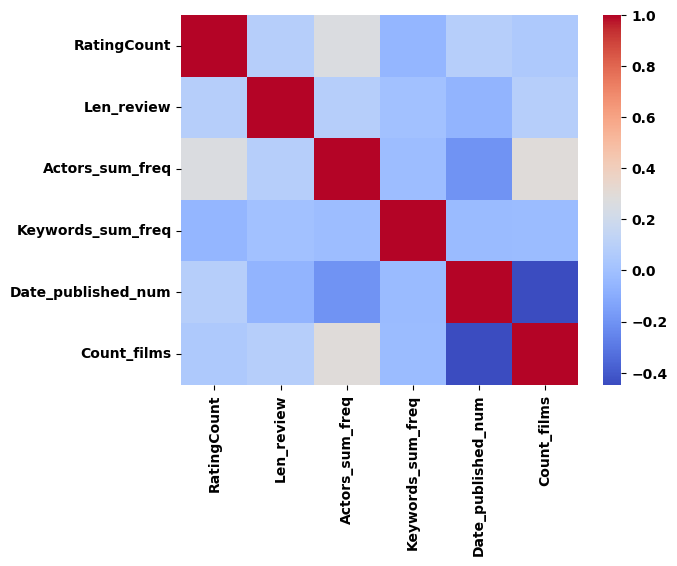

In [9]:
sns.heatmap(X[numerical_features].corr(), cmap= 'coolwarm')

In [10]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, root_mean_squared_error

def metrics(model_name, y_test, y_pred):
    mae = mean_absolute_error(y_test, y_pred)
    rmse = root_mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f'MAE = {mae}')
    print(f'RMSE = {rmse}')
    print(f'r2_score = {r2}')
    models_dict[model_name] = [mae, rmse, r2]

models_dict = {}

### Baseline - mean

In [12]:
from sklearn.dummy import DummyRegressor

dummy_clf = DummyRegressor(strategy='mean')
dummy_clf.fit(X_train, y_train)
y_pred = dummy_clf.predict(X_test)

metrics('Const(mean)', y_test, y_pred)

MAE = 0.8725338073653328
RMSE = 1.1296042641839212
r2_score = -0.00023479178797747302


### Ridge

In [14]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Ridge

clf = Ridge(random_state = 42)
params = {'alpha': np.arange(0, 5, 0.1)}

grid_search_ridge = GridSearchCV(clf, params, cv=5)
grid_search_ridge.fit(X_train, y_train)
best_ridge = grid_search_ridge.best_estimator_
y_pred = best_ridge.predict(X_test)

metrics('Ridge(L2-reg)', y_test, y_pred)

MAE = 0.7121424096526574
RMSE = 0.9363935723658344
r2_score = 0.31266864155820184


### Decision Tree

In [16]:
from sklearn.tree import DecisionTreeRegressor

clf = DecisionTreeRegressor(random_state = 42)
params = {'max_depth': range(1,20), 'min_samples_leaf': range(6,16)}
grid_search_tree = GridSearchCV(clf, params, cv=5)
grid_search_tree.fit(X_train, y_train)
best_tree = grid_search_tree.best_estimator_
y_pred = best_tree.predict(X_test)

metrics('Decision Tree', y_test, y_pred)

MAE = 0.6485298066729671
RMSE = 0.8832893854782482
r2_score = 0.38841710048657496


In [17]:
best_tree

DecisionTreeRegressor(max_depth=11, min_samples_leaf=13, random_state=42)

In [18]:
features = pd.DataFrame({'features': X.columns, 'feature_importances': best_tree.feature_importances_}) \
                                        .sort_values('feature_importances', ascending=False)

features.iloc[:10, :]

,features,feature_importances
0,RatingCount,0.235009
19,Horror,0.218604
4,Date_published_num,0.142015
13,Documentary,0.086519
14,Drama,0.085703
2,Actors_sum_freq,0.039923
9,Animation,0.037665
27,Short,0.030914
26,Sci-Fi,0.025708
30,Thriller,0.020257


## RandomForest

In [20]:
from sklearn.ensemble import RandomForestRegressor

rfr = RandomForestRegressor(random_state = 42, min_samples_leaf=3)

rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

metrics('Random Forest', y_test, y_pred)

MAE = 0.6047038999578392
RMSE = 0.8325259865534327
r2_score = 0.456693491671341


In [21]:
rfr.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'squared_error',
 'max_depth': None,
 'max_features': 1.0,
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 3,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 42,
 'verbose': 0,
 'warm_start': False}

## XGBoost

In [23]:
from xgboost import XGBRegressor
from sklearn.model_selection import cross_val_score


model = XGBRegressor()
params = {'n_estimators': range(100,1000,100), 'max_depth': range(2,5), 'learning_rate': list(np.arange(0.01, 0.3, 0.05))}
grid_search = GridSearchCV(model, params)
grid_search.fit(X_train, y_train, verbose=1)

best_model = grid_search.best_estimator_
print(best_model.get_params())

y_pred = best_model.predict(X_test)

metrics('XGBoost', y_test, y_pred)

{'objective': 'reg:squarederror', 'base_score': None, 'booster': None, 'callbacks': None, 'colsample_bylevel': None, 'colsample_bynode': None, 'colsample_bytree': None, 'device': None, 'early_stopping_rounds': None, 'enable_categorical': False, 'eval_metric': None, 'feature_types': None, 'gamma': None, 'grow_policy': None, 'importance_type': None, 'interaction_constraints': None, 'learning_rate': 0.060000000000000005, 'max_bin': None, 'max_cat_threshold': None, 'max_cat_to_onehot': None, 'max_delta_step': None, 'max_depth': 4, 'max_leaves': None, 'min_child_weight': None, 'missing': nan, 'monotone_constraints': None, 'multi_strategy': None, 'n_estimators': 900, 'n_jobs': None, 'num_parallel_tree': None, 'random_state': None, 'reg_alpha': None, 'reg_lambda': None, 'sampling_method': None, 'scale_pos_weight': None, 'subsample': None, 'tree_method': None, 'validate_parameters': None, 'verbosity': None}
MAE = 0.5936932434166334
RMSE = 0.8146205171579003
r2_score = 0.4798123961126476


## Results

In [25]:
results = pd.DataFrame(models_dict).transpose().rename(columns={0: 'MAE', 1: 'RMSE', 2: 'r2_score'})
results

,MAE,RMSE,r2_score
Const(mean),0.872534,1.129604,-0.000235
Ridge(L2-reg),0.712142,0.936394,0.312669
Decision Tree,0.648530,0.883289,0.388417
Random Forest,0.604704,0.832526,0.456693
XGBoost,0.593693,0.814621,0.479812
